In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random_deletion
import imputers
import utils

from importlib import reload
from sklearn.preprocessing import LabelEncoder, scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import KFold, cross_val_score, StratifiedKFold

In [2]:
reload(imputers)
reload(utils)

<module 'utils' from '/Users/emilkaumov/Documents/cmc/special/missing_value/utils.py'>

### Загрузим  и подготовим данные

1. Сделаем маску для разделения категориальных/порядковых признаков от количественных признаков.
2. Заменим все категориальные на числовые.
3. Выделим целевой вектор.
4. Отмасштабируем количественные признаки.

#### KRKP

Chess (King-Rook vs. King-Pawn) Data Set

https://archive.ics.uci.edu/ml/datasets/Chess+%28King-Rook+vs.+King-Pawn%29

In [3]:
krkp = pd.read_csv("dataset/kr-vs-kp.csv", header=1)

In [4]:
krkp.columns = ["col" + str(i) for i in range(1, krkp.shape[1] + 1)]

In [5]:
for i in range(1, krkp.shape[1] + 1):
    if isinstance(krkp["col" + str(i)][0], str): 
        krkp["col" + str(i)] = LabelEncoder().fit_transform(krkp["col" + str(i)])

In [6]:
krkp_y    = krkp["col37"]
krkp.drop("col37", axis=1, inplace=True)

In [7]:
krkp    = np.array(krkp, dtype='float')
krkp_y  = np.array(krkp_y)
krkp_cv = KFold(krkp_y.shape[0], n_folds=10, shuffle=True, random_state=798)

In [8]:
clf = RandomForestClassifier(n_jobs=-1, criterion='entropy', n_estimators=100, random_state=1)
clf.fit(krkp, krkp_y)
imp = clf.feature_importances_
krkp_del_columns = np.argsort(imp)[krkp.shape[1] // 2 :]

In [9]:
krkp

array([[ 0.,  0.,  0., ...,  1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  1.,  0.],
       ..., 
       [ 1.,  0.,  0., ...,  1.,  0.,  0.],
       [ 1.,  0.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  1., ...,  0.,  0.,  0.]])

#### Credit-g

Statlog (German Credit Data) Data Set 

https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29

In [10]:
creditg = pd.read_csv("dataset/credit-g.csv", header=1)

In [11]:
creditg.columns = ["col" + str(i) for i in range(1, creditg.shape[1] + 1)]

In [12]:
for i in range(1, creditg.shape[1] + 1):
    if isinstance(creditg["col" + str(i)][0], str): 
        creditg["col" + str(i)] = LabelEncoder().fit_transform(creditg["col" + str(i)])

In [13]:
creditg_y    = creditg['col21']
creditg.drop("col21", axis=1, inplace=True)

In [14]:
creditg    = np.array(creditg, dtype='float')
creditg_y  = np.array(creditg_y)
creditg_cv = KFold(creditg_y.shape[0], n_folds=10, shuffle=True, random_state=798)

In [15]:
clf = RandomForestClassifier(n_jobs=-1, criterion='entropy', n_estimators=100, random_state=1)
clf.fit(creditg, creditg_y)
imp = clf.feature_importances_
creditg_del_columns = np.argsort(imp)[creditg.shape[1] // 2 :]

In [16]:
creditg

array([[  1.,   6.,   1., ...,   1.,   1.,   1.],
       [  0.,  48.,   3., ...,   1.,   0.,   1.],
       [  3.,  12.,   1., ...,   2.,   0.,   1.],
       ..., 
       [  3.,  12.,   3., ...,   1.,   0.,   1.],
       [  1.,  45.,   3., ...,   1.,   1.,   1.],
       [  0.,  45.,   1., ...,   1.,   0.,   1.]])

In [17]:
creditg = scale(creditg)

#### Segment

Image Segmentation Data Set 

https://archive.ics.uci.edu/ml/datasets/Image+Segmentation

In [18]:
segment = pd.read_csv("dataset/segment.csv",  header=1)

In [19]:
segment.columns = ["col" + str(i) for i in range(1, segment.shape[1] + 1)]

In [20]:
for i in range(1, segment.shape[1] + 1):
    if isinstance(segment["col" + str(i)][0], str):
        segment["col" + str(i)] = LabelEncoder().fit_transform(segment["col" + str(i)])

In [21]:
segment_y    = segment['col20']
segment.drop("col20", axis=1, inplace=True)

In [22]:
segment    = np.array(segment, dtype='float')
segment_y  = np.array(segment_y)
segment_cv = KFold(segment_y.shape[0], n_folds=10, shuffle=True, random_state=798)
segment_cv = StratifiedKFold(segment_y, n_folds=5, shuffle=True, random_state=798)

In [23]:
clf = RandomForestClassifier(n_jobs=-1, criterion='entropy', n_estimators=100, random_state=1)
clf.fit(segment, segment_y)
imp = clf.feature_importances_
segment_del_columns = np.argsort(imp)[segment.shape[1] // 2 :]

In [24]:
segment

array([[  2.18000000e+02,   1.78000000e+02,   9.00000000e+00, ...,
          7.52222000e+01,   3.18996000e-01,  -2.04055000e+00],
       [  1.13000000e+02,   1.30000000e+02,   9.00000000e+00, ...,
          2.55556000e+00,   1.00000000e+00,  -2.12325000e+00],
       [  2.02000000e+02,   4.10000000e+01,   9.00000000e+00, ...,
          1.39778000e+02,   1.99347000e-01,  -2.29992000e+00],
       ..., 
       [  8.00000000e+01,   7.20000000e+01,   9.00000000e+00, ...,
          7.44444000e+01,   3.14606000e-01,  -2.09022000e+00],
       [  9.80000000e+01,   1.33000000e+02,   9.00000000e+00, ...,
          2.77778000e+00,   1.00000000e+00,  -2.12325000e+00],
       [  1.90000000e+01,   1.47000000e+02,   9.00000000e+00, ...,
          7.00000000e+00,   7.13228000e-01,  -1.47564000e+00]])

In [25]:
segment = scale(segment)

#### Horse

Horse Colic Data Set 

https://archive.ics.uci.edu/ml/datasets/Horse+Colic

In [26]:
cols = ['col' + str(i) for i in range(28)]
horse = pd.DataFrame(columns=cols)

with open('dataset/horse-colic.data.txt', 'r') as file:
    for s in file:
        s = s.rstrip()
        horse = horse.append(pd.DataFrame(np.array(s.split(' ')).reshape((1, -1)), columns=cols))

In [27]:
horse[horse == '?'] = np.nan

horse_y = np.array(horse.col23, dtype=int)
horse.drop(['col2', 'col23' , 'col24', 'col25', 'col26', 'col27'], axis=1, inplace=True)

horse = np.array(horse, dtype=float)
horse_cv = StratifiedKFold(horse_y, n_folds=10, shuffle=True, random_state=798)

In [28]:
horse

array([[  2. ,   1. ,  38.5, ...,   nan,   nan,   2. ],
       [  1. ,   1. ,  39.2, ...,   2. ,   2. ,   3. ],
       [  2. ,   1. ,  38.3, ...,   nan,   nan,   1. ],
       ..., 
       [  1. ,   1. ,  37.5, ...,   nan,   nan,   2. ],
       [  1. ,   1. ,  36.5, ...,   3. ,   3.4,   1. ],
       [  1. ,   1. ,  37.2, ...,   1. ,   1. ,   3. ]])

In [30]:
for i in range(horse.shape[1]):
    mask = np.isnan(horse[:, i])
    horse[~ mask, i] = scale(horse[~ mask, i])

#### Votes

Congressional Voting Records Data Set 

https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records

In [31]:
cols = ['col' + str(i) for i in range(17)]
votes = pd.DataFrame(columns=cols)

with open('dataset/house-votes-84.data.txt', 'r') as file:
    for s in file:
        s = s.rstrip()
        votes = votes.append(pd.DataFrame(np.array(s.split(',')).reshape((1, -1)), columns=cols))

In [32]:
votes[votes == '?'] = np.nan
votes[votes == 'y'] = 1
votes[votes == 'n'] = 0

votes_y = LabelEncoder().fit_transform(votes.col0)
votes.drop('col0', axis=1, inplace=True)

votes      = np.array(votes, dtype=float)
votes_cv   = StratifiedKFold(votes_y, n_folds=10, shuffle=True, random_state=798)

In [33]:
votes

array([[  0.,   1.,   0., ...,   1.,   0.,   1.],
       [  0.,   1.,   0., ...,   1.,   0.,  nan],
       [ nan,   1.,   1., ...,   1.,   0.,   0.],
       ..., 
       [  0.,  nan,   0., ...,   1.,   0.,   1.],
       [  0.,   0.,   0., ...,   1.,   0.,   1.],
       [  0.,   1.,   0., ...,   1.,  nan,   0.]])

#### Cancer

Breast Cancer Wisconsin (Original) Data Set

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29

In [34]:
cols = ['col' + str(i) for i in range(10)]
cancer = pd.DataFrame(columns=cols)

with open('dataset/breast-cancer-wisconsin.data.txt', 'r') as file:
    for s in file:
        s = s.rstrip()
        cancer = cancer.append(pd.DataFrame(np.array(s.split(',')[1:]).reshape((1, -1)), columns=cols))

In [35]:
cancer_y = np.array(cancer.col9, dtype=int)
cancer_y[cancer_y == 2] = 0
cancer_y[cancer_y == 4] = 1

cancer[cancer == '?'] = np.nan
cancer.drop('col9', axis=1, inplace=True)
cancer = np.array(cancer, dtype=float)

cancer_cv = StratifiedKFold(cancer_y, n_folds=10, shuffle=True, random_state=798)

In [36]:
cancer

array([[  5.,   1.,   1., ...,   3.,   1.,   1.],
       [  5.,   4.,   4., ...,   3.,   2.,   1.],
       [  3.,   1.,   1., ...,   3.,   1.,   1.],
       ..., 
       [  5.,  10.,  10., ...,   8.,  10.,   2.],
       [  4.,   8.,   6., ...,  10.,   6.,   1.],
       [  4.,   8.,   8., ...,  10.,   4.,   1.]])

In [37]:
for i in range(cancer.shape[1]):
    mask = np.isnan(cancer[:, i])
    cancer[~ mask, i] = scale(cancer[~ mask, i])

Заметим, что три первых датасета не имеют пропущенных значений, три последних имеют натуральные пропуски в данных.

### Сравнение методов.

##### 5 % пропущенных значений во всех объектах и всех признаках.

In [ ]:
krkp_del    = random_deletion.make_missing_value(krkp,    del_fraction=0.05)
creditg_del = random_deletion.make_missing_value(creditg, del_fraction=0.05)
segment_del = random_deletion.make_missing_value(segment, del_fraction=0.05)

#### KRKP

In [ ]:
res_krkp = utils.dataset_exps(krkp_del, krkp_y, krkp_cv, add_binary=False)

In [ ]:
res_krkp

#### Creditg

In [ ]:
res_creditg = utils.dataset_exps(creditg_del, creditg_y, creditg_cv, add_binary=False)

In [ ]:
res_creditg

#### Segment

In [ ]:
res_segment = utils.dataset_exps(segment_del, segment_y, segment_cv, add_binary=False)

In [ ]:
res_segment

#### Horse

In [38]:
res_horse = utils.dataset_exps(horse, horse_y, horse_cv, add_binary=False)

In [39]:
res_horse

,RF,LR,kNN
special,0.859863,0.800393,0.839970
common,0.853196,0.813511,0.826967
mean,0.843296,0.800393,0.839970
svd,0.820078,0.809733,0.860085
knn,0.843419,0.816630,0.810085
rf,0.820293,0.806507,0.813296
lr,0.833856,0.819633,0.826637
em,0.836622,0.819740,0.826637
k-means,0.846415,0.816737,0.843196
zet,0.846637,0.809733,0.813404


In [52]:
res_horse_2 = utils.dataset_exps(horse, horse_y, horse_cv, add_binary=True)

#### Votes

In [40]:
res_votes = utils.dataset_exps(votes, votes_y, votes_cv, add_binary=False)

In [41]:
res_votes

,RF,LR,kNN
ignore,0.951729,0.952668,0.922546
special,0.958610,0.958447,0.921655
common,0.963317,0.960772,0.926414
mean,0.963208,0.956174,0.940051
svd,0.949464,0.953954,0.930852
knn,0.951681,0.958716,0.924036
rf,0.949031,0.953901,0.924036
lr,0.956496,0.951737,0.933233
em,0.951845,0.956335,0.935666
k-means,0.942432,0.960772,0.942324


In [53]:
res_votes_2 = utils.dataset_exps(votes, votes_y, votes_cv, add_binary=True)

#### Cancer

In [42]:
res_cancer = utils.dataset_exps(cancer, cancer_y, cancer_cv, add_binary=False)

In [43]:
res_cancer

,RF,LR,kNN
ignore,0.959121,0.969437,0.969394
special,0.955652,0.968550,0.971387
common,0.954244,0.968550,0.968530
mean,0.958529,0.968550,0.971387
svd,0.962815,0.968550,0.969979
knn,0.962815,0.968550,0.969979
rf,0.959958,0.968550,0.969979
lr,0.962815,0.968550,0.969979
em,0.962815,0.968550,0.969979
k-means,0.962815,0.968550,0.969979


In [54]:
res_cancer_2 = utils.dataset_exps(cancer, cancer_y, cancer_cv, add_binary=True)

#### Добавление бинарного признака-индикатора

In [55]:
with_binary = (res_cancer_2.mean(0) + res_votes_2.mean(0) + res_horse_2.mean(0)) / 3
without_binary = (res_cancer.mean(0) + res_votes.mean(0) + res_horse.mean(0)) / 3

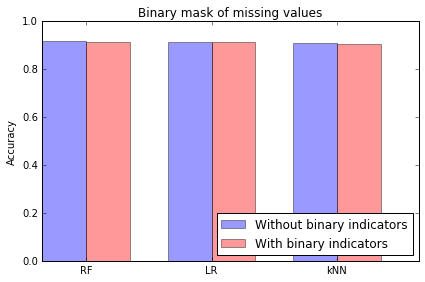

In [56]:
n_groups = 3
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, without_binary, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='Without binary indicators')

rects2 = plt.bar(index + bar_width, with_binary, bar_width,
                 alpha=opacity,
                 color='r',
                 error_kw=error_config,
                 label='With binary indicators')

plt.ylabel('Accuracy')
plt.title('Binary mask of missing values')
plt.xticks(index + bar_width, ('RF', 'LR', 'kNN'))
plt.legend(loc='lower right')

plt.tight_layout()
plt.savefig('binarymask.pdf')
plt.show()

### Сравним для разных долей пропущенных значений.

Пропущенные значения для всех объектов в _половине_ признаков. 

In [73]:
missing_frac_range = [0.0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15]

In [74]:
num_iter = 10

In [75]:
clf = RandomForestClassifier(n_jobs=-1, criterion='entropy', n_estimators=100, random_state=666)

In [ ]:
accuracy_krkp_rf, rmse_krkp_rf = utils.make_experiments(krkp, krkp_y, clf, krkp_cv, missing_frac_range, 
                                                        num_iter=num_iter, sp_value=-1, add_binary=False, 
                                                        del_columns=krkp_del_columns)
accuracy_krkp_rf.drop('ignore', axis=0, inplace=True)
rmse_krkp_rf.drop('ignore', axis=0, inplace=True)

In [ ]:
accuracy_creditg_rf, rmse_creditg_rf = utils.make_experiments(creditg, creditg_y, clf, creditg_cv, missing_frac_range, 
                                                              num_iter=num_iter, sp_value=-1, add_binary=False,
                                                              del_columns=creditg_del_columns)
accuracy_creditg_rf.drop('ignore', axis=0, inplace=True)
rmse_creditg_rf.drop('ignore', axis=0, inplace=True)

In [ ]:
accuracy_segment_rf, rmse_segment_rf = utils.make_experiments(segment, segment_y, clf, segment_cv, missing_frac_range, 
                                                              num_iter=num_iter, sp_value=-1, add_binary=False,
                                                              del_columns=segment_del_columns)
accuracy_segment_rf.drop('ignore', axis=0, inplace=True)
rmse_segment_rf.drop('ignore', axis=0, inplace=True)

In [ ]:
clf = LogisticRegression(C=1.0, penalty='l2')

In [ ]:
accuracy_krkp_lr, rmse_krkp_lr = utils.make_experiments(krkp, krkp_y, clf, krkp_cv, missing_frac_range, 
                                                        num_iter=num_iter, sp_value=0, add_binary=False,
                                                        del_columns=krkp_del_columns,
                                                        del_columns=segment_del_columns)
accuracy_krkp_lr.drop('ignore', axis=0, inplace=True)
rmse_krkp_lr.drop('ignore', axis=0, inplace=True)

In [ ]:
accuracy_creditg_lr, rmse_creditg_lr = utils.make_experiments(creditg, creditg_y, clf, creditg_cv, missing_frac_range, 
                                                              num_iter=num_iter, sp_value=0, add_binary=False,
                                                              del_columns=creditg_del_columns)
accuracy_creditg_lr.drop('ignore', axis=0, inplace=True)
rmse_creditg_lr.drop('ignore', axis=0, inplace=True)

In [ ]:
accuracy_segment_lr, rmse_segment_lr = utils.make_experiments(segment, segment_y, clf, segment_cv, missing_frac_range, 
                                                              num_iter=num_iter, sp_value=0, add_binary=False,
                                                              del_columns=segment_del_columns)
accuracy_segment_lr.drop('ignore', axis=0, inplace=True)
rmse_segment_lr.drop('ignore', axis=0, inplace=True)

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

In [ ]:
accuracy_krkp_knn, rmse_krkp_knn = utils.make_experiments(krkp, krkp_y, clf, krkp_cv, missing_frac_range, 
                                                          num_iter=num_iter, sp_value=0, add_binary=False,
                                                          del_columns=krkp_del_columns)
accuracy_krkp_knn.drop('ignore', axis=0, inplace=True)
rmse_krkp_knn.drop('ignore', axis=0, inplace=True)

In [ ]:
accuracy_creditg_knn, rmse_creditg_knn = utils.make_experiments(creditg, creditg_y, clf, creditg_cv, missing_frac_range, 
                                                                num_iter=num_iter, sp_value=0, add_binary=False,
                                                                del_columns=creditg_del_columns)
accuracy_creditg_knn.drop('ignore', axis=0, inplace=True)
rmse_creditg_knn.drop('ignore', axis=0, inplace=True)

In [ ]:
accuracy_segment_knn, rmse_segment_knn = utils.make_experiments(segment, segment_y, clf, segment_cv, missing_frac_range, 
                                                                num_iter=num_iter, sp_value=0, add_binary=False,
                                                                del_columns=segment_del_columns)
accuracy_segment_knn.drop('ignore', axis=0, inplace=True)
rmse_segment_knn.drop('ignore', axis=0, inplace=True)

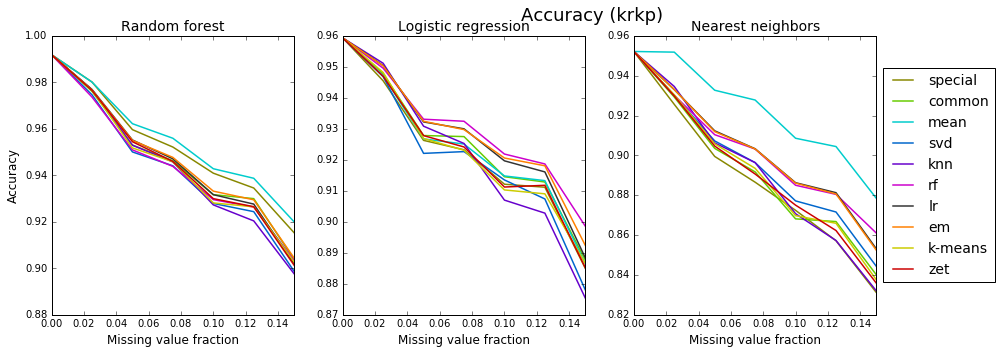

In [178]:
utils.make_plots_accuracy(accuracy_krkp_rf, accuracy_krkp_lr, accuracy_krkp_knn, 'krkp', 'krkp.pdf')

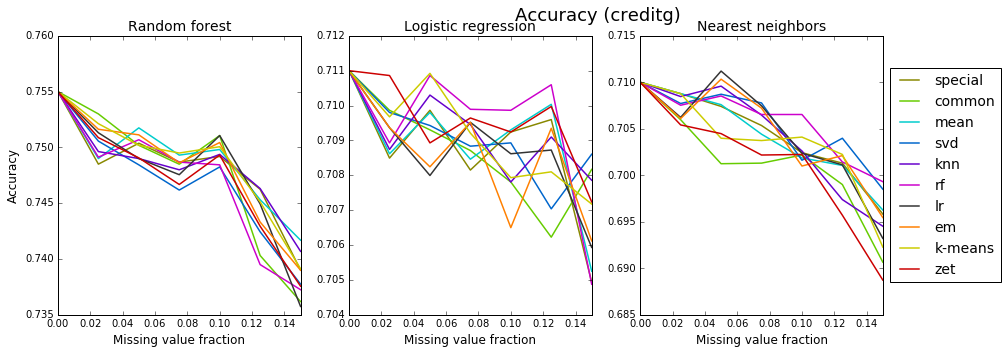

In [179]:
utils.make_plots_accuracy(accuracy_creditg_rf, accuracy_creditg_lr, accuracy_creditg_knn, 'creditg', 'creditg.pdf')

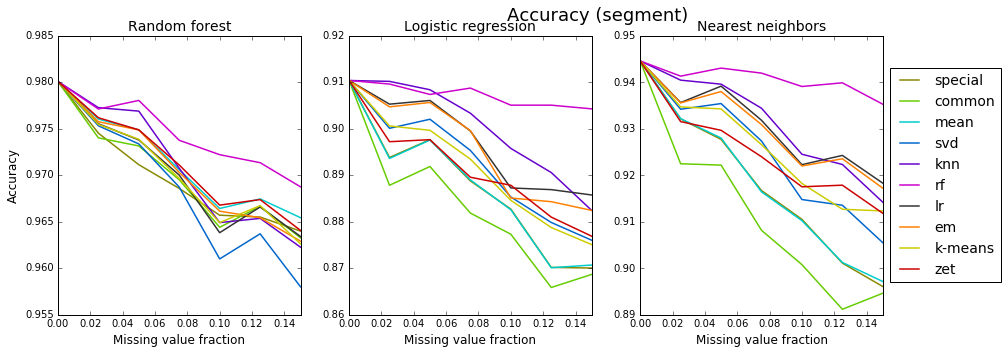

In [180]:
utils.make_plots_accuracy(accuracy_segment_rf, accuracy_segment_lr, accuracy_segment_knn, 'segment', 'segment.pdf')

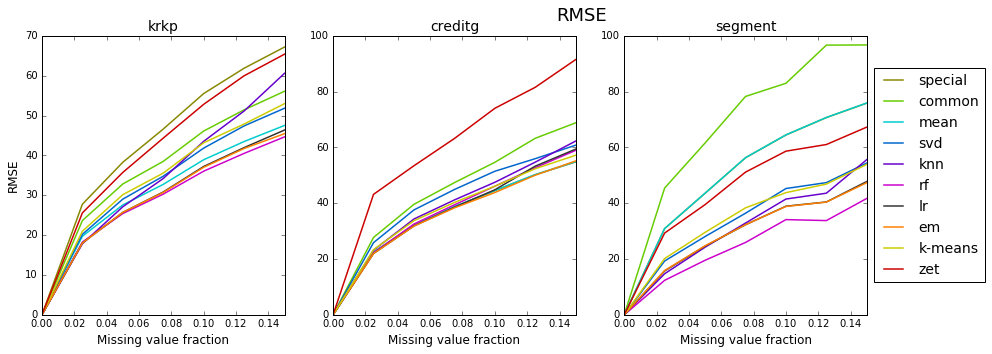

In [181]:
utils.make_plots_rmse(rmse_krkp, rmse_creditg, rmse_segment, 'rmse.pdf')